In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patches as patches
from matplotlib.path import Path
import scipy
from scipy import ndimage
import scipy.misc as im
import copy

In [2]:
#given functions:

# Load Dataset
def load_subset(subsets, base_path='data/yaleBfaces'):
    data = []
    label = []
    
    for subset in subsets:
        directory = os.path.join(base_path, "subset" + str(subset))
        files = os.listdir(directory)
        for img in files:
            face = im.imread(os.path.join(directory,img), flatten=True)
            data.append(face)
            label.append(int(img.split('person')[1].split('_')[0]))
    return data, label

# Draw faces
def draw_faces(img_list, col=10):
    fig = plt.figure(figsize = (30,30))
    if len(img_list) < col:
        col = len(img_list)
        row = 1
    else:
        row = int(len(img_list)/col)
    for sub_img in range(1,row*col+1):
        ax = fig.add_subplot(row, col, sub_img)
        ax.imshow(img_list[sub_img-1], cmap='gray')
        ax.axis('off')
    plt.show()

In [3]:
#load training and test face datasets:
train_data,train_labels = load_subset([0],'yaleBfaces/')
test1_data,test1_labels = load_subset([1],'yaleBfaces/') 
test2_data,test2_labels = load_subset([2],'yaleBfaces/') 
test3_data,test3_labels = load_subset([3],'yaleBfaces/') 
test4_data,test4_labels = load_subset([4],'yaleBfaces/')
test_data_list = [test1_data, test2_data, test3_data, test4_data]
test_labels_list = [test1_labels, test2_labels, test3_labels, test4_labels]



# 1: Naive Recognition / 2: K Nearest Neighbors

In [4]:
#algorithm to predict similar faces:
def k_nearest_neighbors(img, train_set, train_labels, k, o, eigen):
    
    #list parallel to test_set containing euclidean distance info
    euclidian = []
    #print('test im: ', img)

    #compute l2 norm between input image and all images in test set
    for train_img in train_set:
        if eigen == False:
            euclidian.append(np.linalg.norm(np.reshape(img, (1, 2500)) - np.reshape(train_img, (1, 2500)) ,ord=o))
        elif eigen == True:
            #print('train im: ', train_img)
            euclidian.append(np.linalg.norm(np.asarray(img) - np.asarray(train_img) ,ord=o))
#             print('norm: ', np.linalg.norm(img - train_img, ord=2))
#             print()

    #make a new data structure so we can sort for top k items:
    pairs = [[train_labels[i], euclidian[i], train_set[i], i] for i in range(len(train_labels))]

    p = sorted(pairs, key=lambda x: x[1])
    
    #get the k predictions for lowest l2 norms
    k_predictions = [p[i][0] for i in range(k)]
#     print(k_predictions)
    
    #prediction we want to return is the mode of k_predictions
    counter = np.bincount(np.asarray(k_predictions))
    
    if k > 1:
        return np.argmax(counter)
    elif k == 1 and eigen == True:
        return np.argmax(counter)
    else:
        return np.argmax(counter), p[0][2]

def accuracy(predictions, labels):
    
    #count matches:
    matches = 0.0
    
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            matches += 1.0
    
    #compute accuracy
    acc = matches / float(len(predictions))
    return acc, matches, (len(predictions) - matches)

#predict most similar face for entire train set against a test set,
#return list and print relevant stats:
def similar_faces(train, train_labels, test_set, test_labels, k, o, eigen):
        
        #list holding predictions for each training image
        if k > 1:
            predictions = [k_nearest_neighbors(img, train, train_labels, k, o, eigen) for img in test_set]
        elif k == 1:
            predictions = [k_nearest_neighbors(img, train, train_labels, k, o, eigen)[0] for img in test_set]
            predicted_images = [k_nearest_neighbors(img, train, train_labels, k, o, eigen)[1] for img in test_set]

        
        #compute and print out accuracy / error info
        a = accuracy(predictions, test_labels)
        print(' test error: ' + str((100*(1-a[0]))) + '%')
        print(' accuracy: ' + str((100*a[0])) + '%', '\n', 'matches: ' + str(a[1]), '\n', 'mismatches: ' + str(a[2]))
        print()
        return predictions
    


In [5]:
#predict faces for each test set for different values of k, report accuracy
# print('k = 1:')
# pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=1, o=2, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=1, o=2, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=1, o=2, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=1, o=2, eigen=False)

# print('k = 3:')
# pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=3, o=2, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=3, o=2, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=3, o=2, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=3, o=2, eigen=False)

# print('k = 5:')
# pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=5, o=2, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=5, o=2, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=5, o=2, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=5, o=2, eigen=False)



In [6]:
# #predict faces for each test set for different values of k, report accuracy
# print('k = 1:')
#pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=1, o=1, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=1, o=1, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=1, o=1, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=1, o=1, eigen=False)

# print('k = 3:')
# pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=3, o=1, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=3, o=1, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=3, o=1, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=3, o=1, eigen=False)

# print('k = 5:')
# pred1 = similar_faces(train_data, train_labels, test1_data, test1_labels, k=5, o=1, eigen=False)
# pred2 = similar_faces(train_data, train_labels, test2_data, test2_labels, k=5, o=1, eigen=False)
# pred3 = similar_faces(train_data, train_labels, test3_data, test3_labels, k=5, o=1, eigen=False)
# pred4 = similar_faces(train_data, train_labels, test4_data, test4_labels, k=5, o=1, eigen=False)


# 3: Recognition Using Eigenfaces

In [24]:
def eigenTrain(train, k):
    
    #make a matrix of vectorized training images:
    vectorized_data = [np.reshape(train_img, (1, 2500))[0] for train_img in train]
    vdt = np.transpose(vectorized_data)
    print("check data matrix:", vdt[0])
    
    #compute the mean for each column of the vectorized_data matrix
    vec_means = []
    for row in vdt:
        vec_means.append(np.mean(row))
    
    #subtract each cell in vectorized_data matrix by the global mean:
    for i in range(len(vectorized_data)):
        for j in range(len(vectorized_data[i])):
            vectorized_data[i][j] = copy.deepcopy(vectorized_data[i][j]) - vec_means[j]
        
    #perform singular value decomposition on vectorized data matrix:
    u, s, v_trans = np.linalg.svd(vectorized_data, full_matrices=True)
    
    #get top k rows of v:
    top_k = v_trans[:k]
    
    return top_k, vec_means, np.transpose(vectorized_data)

def stackImages(eigen_data):
    
    #make a list of 50 x 50 images for each row in eigen_data
    reshaped = [np.reshape(row, (50, 50)) for row in eigen_data]
    
    
    #hstack and vstack until we have a nice image to show:
    img_1 = np.hstack(reshaped[:int(len(eigen_data)/2)])
    img_2 = np.hstack(reshaped[int(len(eigen_data)/2):])
    #img_1 = np.hstack(reshaped[:10])
    #img_2 = np.hstack(reshaped[10:])
    img_stack = np.vstack((img_1, img_2))
    
    fig, ax = plt.subplots(figsize=(36, 4))
    ax.imshow(img_stack, cmap='gray')
    
    #draw_faces(reshaped)

#reconstruct image using eigenvector data:
def reconstruct_image(eigenvectors, image, averages):
    
    #vectorize and transpose image:
    vec = np.transpose(np.reshape(image, (1, 2500)))
    
    #subtract average pixel value from each pixel in vec:
    for i in range(len(vec)):
        vec[i] = vec[i] - averages[i]
    #vec = [vec[i] - averages[i] for i in range(len(averages))]
    
    #project vectorized image into eigenspace:
    eig_img = np.matmul(np.transpose(eigenvectors), vec)
    
    #reconstruct:
    rec = np.matmul(eigenvectors, eig_img)
    
    for i in range(len(rec)):
        rec[i] = rec[i] + averages[i]
    
    #reshape:
    return np.reshape(rec, (50, 50))

#reconstruct images with varying values of k:
def reconstruct_wrapper(images, img_labels):
    
    #get eigenvectors and averages for k = 1 -> 10
    k_eigs = []
    k_averages = []
    for i in range(1, 11):
        pair = eigenTrain(train_data, k=i)
        k_eigs.append(pair[0])
        k_averages.append(pair[1])
    
    #reconstruct the first ten images of the training set for each value of k:
    reconstructed = []
    labels = []
    for j in range(len(images)):
        
        #only reconstruct one image per person:
        if img_labels[j] not in labels:
            labels.append(img_labels[j])
            item = []
            for i in range(len(k_eigs)):
                item.append(reconstruct_image(k_eigs[i], copy.deepcopy(images[j]), k_averages[i]))
            reconstructed.append(item)
    
    #stack images:
    my_stack = np.vstack([np.hstack(row) for row in reconstructed])
    
    #display images:
    fig, ax = plt.subplots(figsize=(36, 20))
    ax.imshow(my_stack, cmap='gray')   


In [573]:
#load training and test face datasets:
train_data,train_labels = load_subset([0],'data/yaleBfaces/')
test1_data,test1_labels = load_subset([1],'data/yaleBfaces/') 
test2_data,test2_labels = load_subset([2],'data/yaleBfaces/') 
test3_data,test3_labels = load_subset([3],'data/yaleBfaces/') 
test4_data,test4_labels = load_subset([4],'data/yaleBfaces/')
test_data_list = [test1_data, test2_data, test3_data, test4_data]
test_labels_list = [test1_labels, test2_labels, test3_labels, test4_labels]
f_faces, avs = fisher()

intial [  94.  114.  115. ...,   76.   67.   70.]
averages: [60.857143, 59.714287, 61.171429, 64.971428, 79.828575, 81.428574, 83.771431, 84.900002, 87.271431, 84.271431]
after subtracting [ 33.1428566   54.2857132   53.82857132 ...,  -7.59999847  -6.24285889
   3.59999847]
[-0.01329749 -0.01226758 -0.01200115 ..., -0.01156571 -0.0109736
 -0.00960218]
(70, 60)


In [8]:
def test_eig(test_data, test_labels, train_data, train_labels):
    
    #call eigen train:
    eig_vecs, eig_avs, vdt = eigenTrain(train_data, 20)
    test_accuracy = [[0 for i in range(20)]for j in range(4)]
    for i in range(len(test_data)):
        test_set = test_data[i]
        for k in range(1, 21):
        #for k in range(6, 26):
            
            eigs = np.transpose(eig_vecs)[:k]
            #eigs = np.transpose(eig_vecs)[5:k]
            k_train = []
            
            #get training images in k dimensions
            for j in range(len(train_data)):
                
                vec = np.reshape(train_data[j], (1, 2500)) - eig_avs
                vec = np.transpose(vec)
                k_train.append(np.matmul(eigs,vec))
            
            #get k dimensional representation of test image
            for j in range(len(test_set)):
                
                vec = np.reshape(test_set[j], (1, 2500)) - eig_avs
                vec = np.transpose(vec)
                k_img = np.matmul(eigs,vec)
                
                #nearest neighbor prediction
                prediction = k_nearest_neighbors(k_img, k_train, train_labels, k=1, o=2, eigen=True)
                
                if prediction == test_labels[i][j]:
                    test_accuracy[i][k-1] += 1
                    #test_accuracy[i][k-6] += 1
        
    return test_accuracy
    
def plotuel(test_labels, a):

    k = [x for x in range(1,21)]
    #k = [x for x in range(5,25)]
    
    #compute error rate based on accuracy
    error = [[0 for i in range(len(a[0]))] for j in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a[0])):
              error[i][j] = 1 - a[i][j]/len(test_labels[i])
    
    #plot things
    colors = ['orange', 'yellow', 'black', 'green']
    for i in range(len(error)):
        fig = plt.plot(k, error[i], color=colors[i], label = 'test_set' + str(i))

    axes = plt.gca()
    #axes.set_xlim([4, 25])
    axes.set_xlabel('number of eigenvectors used')
    axes.set_ylabel('Prediction errror rate')
    axes.legend(loc='best', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
    plt.title('Error rate with varying k values')
                
                
       
            

In [9]:
plotuel(test_labels_list, sa)



NameError: name 'sa' is not defined

In [336]:
sa = test_eig(test_data_list, test_labels_list, train_data, train_labels)


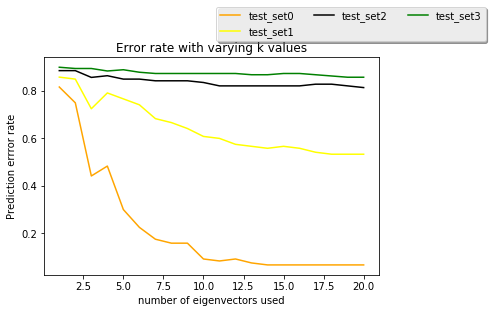

In [480]:
plotuel(test_labels_list, sa)




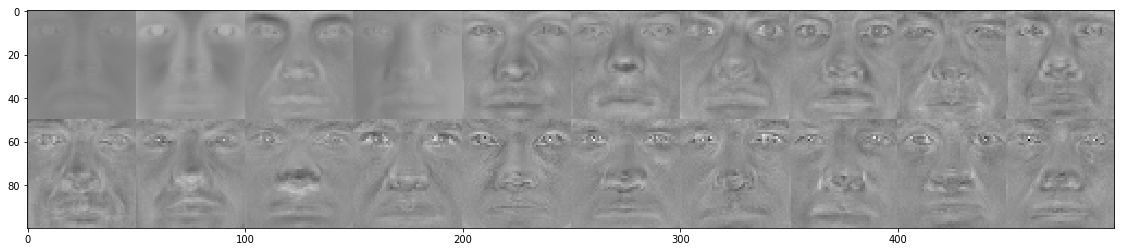

In [503]:
#show eigenfaces for k=20
dat_mat, mu, v = eigenTrain(train_data, k=20)
stackImages(np.transpose(dat_mat))

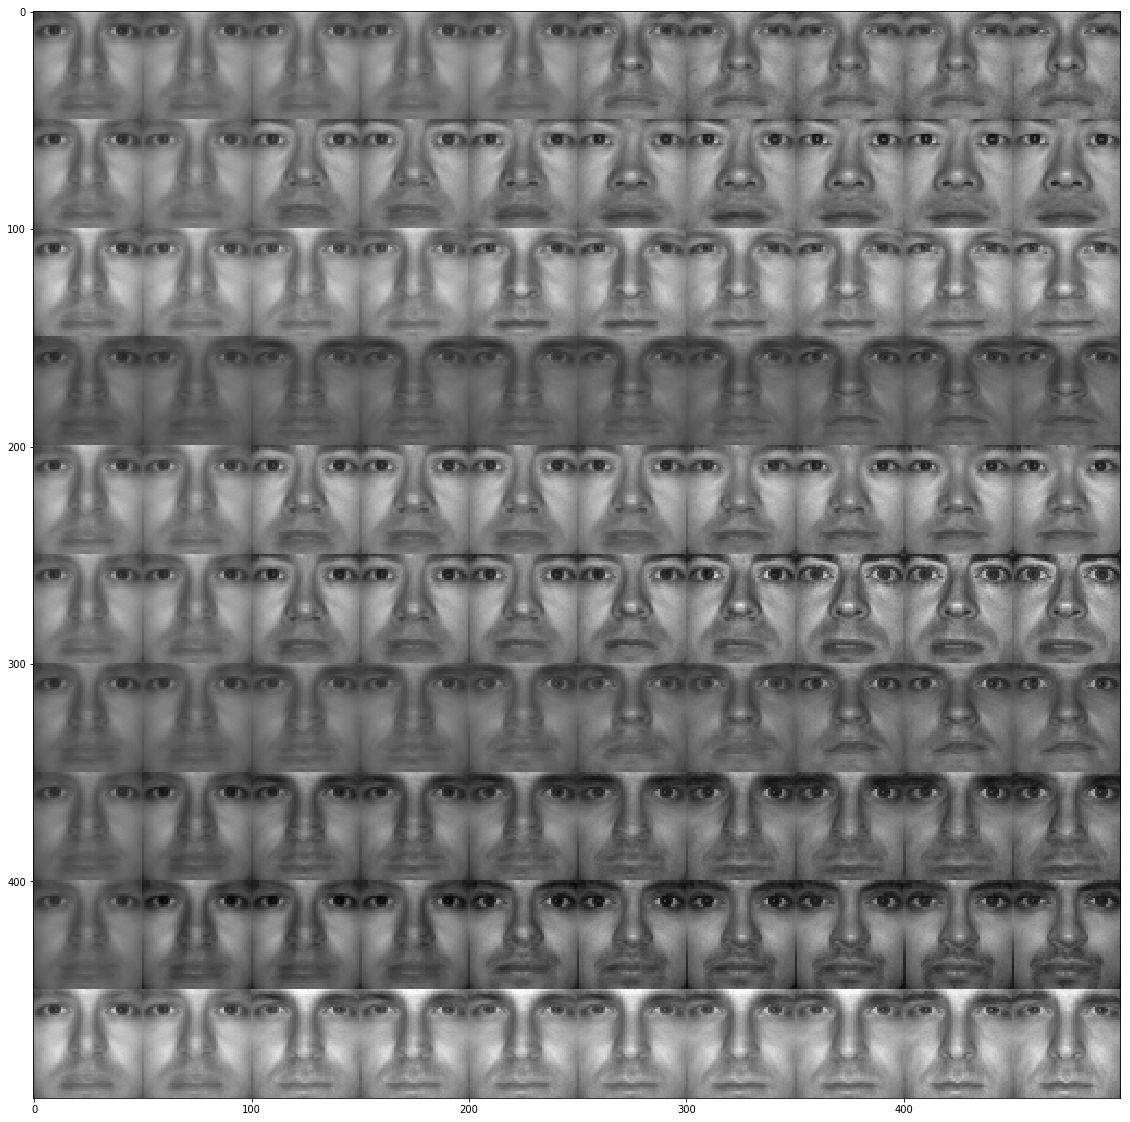

In [34]:
#compute brotatoes
reconstruct_wrapper(train_data, train_labels)

# 4: Recognition Using Fisherfaces


In [91]:
#functions:

def fisher():
    
    #create wpca matrix using eigenTrain(k=60):
    wpca, mu, data = eigenTrain(train_data, k=60)
    
    print(np.shape(data),data[0])
    print()
    
    #project the data matrix into lower dimensional space:
    p_data = np.transpose(np.matmul(wpca, data))
    
    #compute class averages for new data matrix
    
    class_averages = []
    av = [0.0 for i in range(60)]
    total_av = [0.0 for i in range(60)]
    #print("check:", p_data[1])
    for i in range(len(p_data)):
        for j in range(len(p_data[i])):
            total_av[j] += p_data[i][j]
            av[j] += p_data[i][j]
        if (i+1) % 7 == 0:
            av = [av[j] / 7 for j in range(len(av))]
            class_averages.append(av)
            av = [0.0 for x in range(60)]
    total_av = [total_av[j] / 70 for j in range(len(total_av))]
    
    
    #compute between class scatter Sb:
    #sb = [[0.0 for i in range(60)] for j in range(60)]
    sb = []
    classes = []
    for i in range(len(class_averages)):
        a = np.matrix([class_averages[i][j]-total_av[j] for j in range(len(total_av))])
        at = np.transpose(a)
        temp = np.dot(np.transpose(a), a)

        if sb != []:
            sb += 7*temp
        else:
            sb = 7*temp
    
#     print('sb',sb[0])
    
    sw = []
    for i in range(len(p_data)):
        cim = p_data[i]
        cl = train_labels[i]
        
        a = np.matrix([cim[j] - class_averages[cl-1][j] for j in range(len(cim))])
        if sw != []:
            sw += np.matmul(np.transpose(a), a)
        else:
            sw = np.matmul(np.transpose(a), a)

    #compute wfld
    wfld = np.transpose(scipy.linalg.eig(sb,sw)[1])
    wfld = wfld[:9]
    
    #compute fisherfaces:
    w = np.matmul(wfld, wpca)
    print("finished")
    return w, mu

def plot_fisher(faces):
    #make a list of 50 x 50 images for each row in eigen_data
    re = [np.reshape(face, (50, 50)) for face in faces]

    img_stack = np.hstack(re)

    fig, ax = plt.subplots(figsize=(36, 20))
    ax.imshow(img_stack, cmap='gray')
    
def test_fish(eig_vecs, eig_avs, test_data, test_labels, train_data, train_labels):
    
    test_accuracy = [[0 for i in range(9)]for j in range(4)]
    for i in range(len(test_data)):
        test_set = test_data[i]
        for k in range(1, 10):
            
            eigs = np.transpose(eig_vecs)[:k]
            #eigs = np.transpose(eig_vecs)[5:k]
            k_train = []
            
            #get training images in k dimensions
            for j in range(len(train_data)):
                vec = np.reshape(train_data[j], (1, 2500)) - eig_avs
                vec = np.transpose(vec)
                k_train.append(np.matmul(eigs,vec))
            
            #get k dimensional representation of test image
            for j in range(len(test_set)):
                
                vec = np.reshape(test_set[j], (1, 2500)) - eig_avs
                vec = np.transpose(vec)
                k_img = np.matmul(eigs,vec)
                
                #nearest neighbor prediction
                prediction = k_nearest_neighbors(k_img, k_train, train_labels, k=1, o=2, eigen=True)
                
                if prediction == test_labels[i][j]:
                    test_accuracy[i][k-1] += 1
                    #test_accuracy[i][k-6] += 1
    return test_accuracy

def plot_fisher_error(test_labels, a):

    k = [x for x in range(1,10)]
    #k = [x for x in range(5,25)]
    
    #compute error rate based on accuracy
    error = [[0 for i in range(len(a[0]))] for j in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a[0])):
              error[i][j] = 1 - a[i][j]/len(test_labels[i])
    
    #plot things
    colors = ['orange', 'yellow', 'black', 'green']
    for i in range(len(error)):
        fig = plt.plot(k, error[i], color=colors[i], label = 'test_set' + str(i))

    axes = plt.gca()
    #axes.set_xlim([4, 25])
    axes.set_xlabel('number of eigenvectors used')
    axes.set_ylabel('Prediction errror rate')
    axes.legend(loc='best', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
    plt.title('Error rate with varying k values')
        
    

In [99]:
#load training and test face datasets:
# train_data,train_labels = load_subset([0],'yaleBfaces/')
# test1_data,test1_labels = load_subset([1],'yaleBfaces/') 
# test2_data,test2_labels = load_subset([2],'yaleBfaces/') 
# test3_data,test3_labels = load_subset([3],'yaleBfaces/') 
# test4_data,test4_labels = load_subset([4],'yaleBfaces/')
# test_data_list = [test1_data, test2_data, test3_data, test4_data]
# test_labels_list = [test1_labels, test2_labels, test3_labels, test4_labels]
# f_faces, avs = fisher()

In [100]:
# 
# testes = test_fish(np.transpose(f_faces), avs, test_data_list, test_labels_list, train_data, train_labels)

In [101]:
# print testes

In [98]:
# plot_fisher_error(test_labels_list, testes)


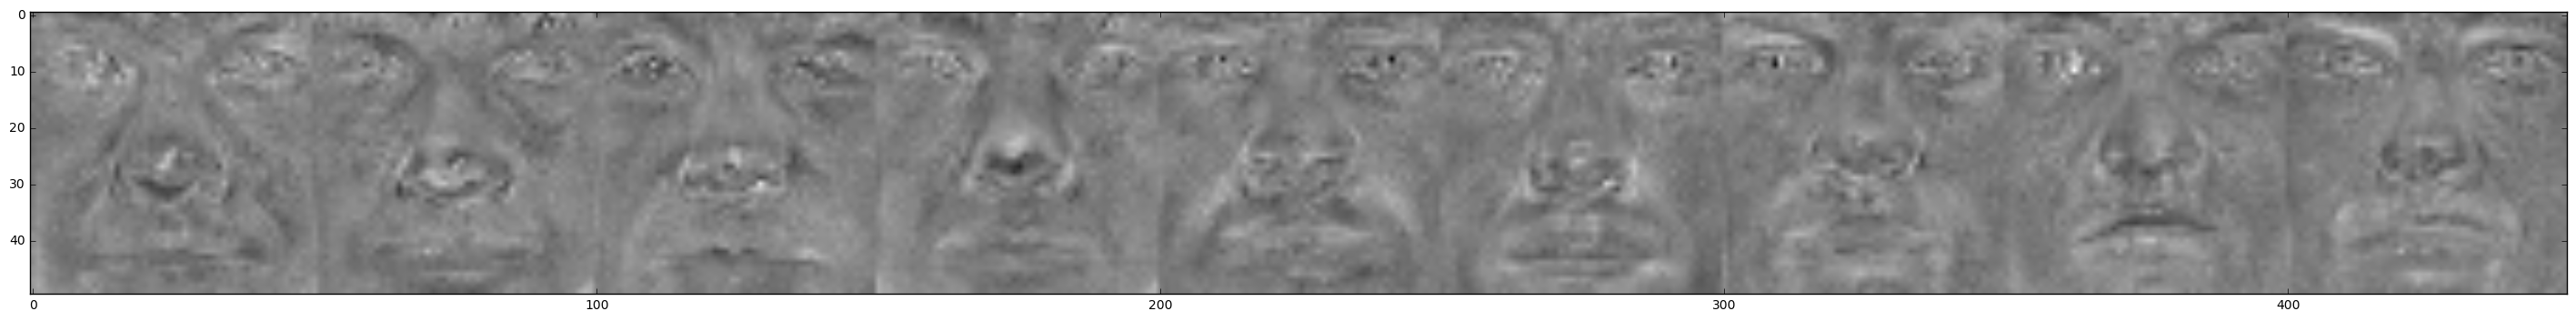

In [94]:
plot_fisher(f_faces)